In [1]:
#api-key='Enter your Api key for your knowledge'

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
api_key = "Enter your Api key" # Insert your Api key here.

from googleapiclient.discovery import build
youtube = build('youtube', 'v3', developerKey=api_key)

import pandas as pd

box = [['Name', 'Comment', 'Time', 'Likes', 'Reply Count']]

#Eudereka, Programming with Mosh, freeCodeCamp
code_lang = [
    {"id":"HXV3zeQKqGY"},
    {"id":"7S_tz1z_5bA"},
    {"id":"zbMHLJ0dY4w"}
]

# sql_vids = pd.DataFrame([])

for id_code in code_lang:
    def scrape_comments_with_replies():
        data = youtube.commentThreads().list(part='snippet', videoId=id_code['id'], maxResults='100', textFormat="plainText").execute()
        
        for i in data["items"]:
            name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
            comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
            published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
            likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
            replies = i["snippet"]['totalReplyCount']
            
            box.append([name, comment, published_at, likes, replies])
            
            totalReplyCount = i["snippet"]['totalReplyCount']
            
            if totalReplyCount > 0:
                
                parent = i["snippet"]['topLevelComment']["id"]
                
                data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                            textFormat="plainText").execute()
                
                for i in data2["items"]:
                    name = i["snippet"]["authorDisplayName"]
                    comment = i["snippet"]["textDisplay"]
                    published_at = i["snippet"]['publishedAt']
                    likes = i["snippet"]['likeCount']
                    replies = ""

                    box.append([name, comment, published_at, likes, replies])

        while ("nextPageToken" in data):
            
            data = youtube.commentThreads().list(part='snippet', videoId=id_code['id'], pageToken=data["nextPageToken"],
                                             maxResults='100', textFormat="plainText").execute()
                                             
            for i in data["items"]:
                name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
                comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
                published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
                likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
                replies = i["snippet"]['totalReplyCount']

                box.append([name, comment, published_at, likes, replies])

                totalReplyCount = i["snippet"]['totalReplyCount']

                if totalReplyCount > 0:
                    
                    parent = i["snippet"]['topLevelComment']["id"]

                    data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                                    textFormat="plainText").execute()

                    for i in data2["items"]:
                        name = i["snippet"]["authorDisplayName"]
                        comment = i["snippet"]["textDisplay"]
                        published_at = i["snippet"]['publishedAt']
                        likes = i["snippet"]['likeCount']
                        replies = ''

                        box.append([name, comment, published_at, likes, replies])

        df = pd.DataFrame({'Name': [i[0] for i in box], 'Comment': [i[1] for i in box], 'Time': [i[2] for i in box],
                       'Likes': [i[3] for i in box], 'Reply Count': [i[4] for i in box]})
        
        sql_vids = pd.DataFrame([])

        sql_vids = sql_vids.append(df, ignore_index = True)

        sql_vids.to_csv('youtube-comments.csv', index=False, header=False)
    
    scrape_comments_with_replies()

C:\Users\MUHAMMAD BILAL\AppData\Local\Temp\ipykernel_12244\59259614.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sql_vids = sql_vids.append(df, ignore_index = True)


In [4]:
data = pd.read_csv(r'youtube-comments.csv',
                 lineterminator='\n')

data.head()

,Name,Comment,Time,Likes,Reply Count\r
0,freeCodeCamp.org,"Click the ""JOIN"" button below the video to sup...",2020-04-08T23:11:28Z,1494,60\r
1,+①③⓪⑦②②⑧⓪②⑦⑨WhatsApp,"For help and support, contact me right away",2022-10-08T07:32:28Z,0,\r
2,Code with Junaid,Thank you so much 😘😘😘😘😘,2022-09-01T20:21:50Z,0,\r
3,Subham Giri,@NipkowDisk depends on which join clause you a...,2022-08-22T16:11:09Z,1,\r
4,Perseus Gaming,how is desribe student different from select *...,2022-08-13T04:52:53Z,0,\r


In [5]:
def cleanTxt(text):
  text = re.sub(r'[^\w]', ' ', str(text))

  return text


data['Comments'] = data['Comment'].apply(cleanTxt)

In [6]:
def getSubjectivity(text):
  return TextBlob(str(text)).sentiment.subjectivity

# get polarity
def getPolarity(text):
  return TextBlob(str(text)).sentiment.polarity

#Columns
data['Subjectivity'] = data['Comment'].apply(getSubjectivity)
data['Polarity'] = data['Comment'].apply(getPolarity)

data

,Name,Comment,Time,Likes,Reply Count\r,Comments,Subjectivity,Polarity
0,freeCodeCamp.org,"Click the ""JOIN"" button below the video to sup...",2020-04-08T23:11:28Z,1494,60\r,Click the JOIN button below the video to sup...,0.000000,0.000000
1,+①③⓪⑦②②⑧⓪②⑦⑨WhatsApp,"For help and support, contact me right away",2022-10-08T07:32:28Z,0,\r,For help and support contact me right away,0.535714,0.285714
2,Code with Junaid,Thank you so much 😘😘😘😘😘,2022-09-01T20:21:50Z,0,\r,Thank you so much,0.200000,0.200000
3,Subham Giri,@NipkowDisk depends on which join clause you a...,2022-08-22T16:11:09Z,1,\r,NipkowDisk depends on which join clause you a...,0.000000,0.000000
4,Perseus Gaming,how is desribe student different from select *...,2022-08-13T04:52:53Z,0,\r,how is desribe student different from select ...,0.600000,0.000000
...,...,...,...,...,...,...,...,...
18108,Omaiz Ahmed,Amazing video! Explained in detail! Thanks edu...,2019-10-10T07:23:13Z,5,0\r,Amazing video Explained in detail Thanks edu...,0.550000,0.568750
18109,Dharmesh Panchal,Info graphics is very accurate for grab subject,2019-10-05T03:59:29Z,6,1\r,Info graphics is very accurate for grab subject,0.578333,0.176667
18110,edureka!,Thanks.,2019-10-06T06:23:30Z,1,\r,Thanks,0.200000,0.200000
18111,Sharan Hinduja,"Very well explained, But try to explain it slo...",2019-10-04T17:21:30Z,7,1\r,Very well explained But try to explain it slo...,0.434722,0.080056


<function matplotlib.pyplot.show(close=None, block=None)>

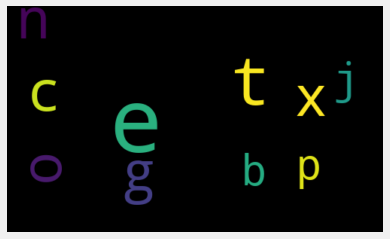

In [7]:
allWords = " ".join( str(cmts for cmts in data['Comment']))
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [8]:
def getAnalysis(score):
  if score < 0 :
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)

In [9]:
pcomments = data[data.Analysis == 'Positive']
pcomments = pcomments['Comment']

print('Positive: ' +str(round((pcomments.shape[0]/data.shape[0])*100, 1))+ '%')

ncomments = data[data.Analysis == 'Negative']
ncomments = ncomments['Comment']

print('Negative: ' +str(round((ncomments.shape[0]/data.shape[0])*100, 1))+ '%')

nucomments = data[data.Analysis == 'Neutral']
nucomments = nucomments['Comment']

print('Nuetral: ' +str(round((nucomments.shape[0]/data.shape[0])*100, 1))+ '%')

Positive: 46.3%
Negative: 10.0%
Nuetral: 43.7%


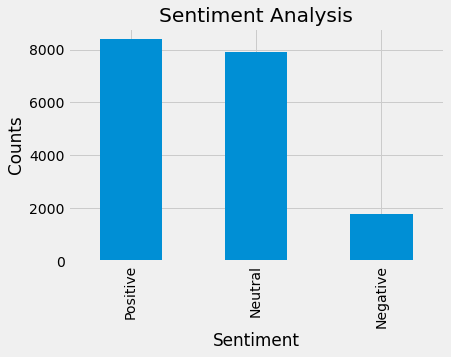

In [10]:
data['Analysis'].value_counts

# Plot
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind= 'bar')
plt.show()